In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn import svm

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
import seaborn as sns

In [12]:
data=pd.read_csv(r"C:\Users\01\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
attrishon=pd.get_dummies(data['Attrition'],dtype=int)

In [17]:
data=pd.concat([data,attrishon],axis=1)

In [18]:
data=data.drop(['Attrition','No'],axis=1)

In [19]:
data=data.rename(columns={'Yes':'Attrition'})

In [20]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [21]:
travel=pd.get_dummies(data['BusinessTravel'],dtype=int)

In [22]:
data=pd.concat([data,travel],axis=1)

In [23]:
data=data.drop(['BusinessTravel'],axis=1)

In [24]:
gender={'Male':0,'Female':1}

In [25]:
data['Gender']=data['Gender'].replace(gender)

In [26]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [27]:
Department=pd.get_dummies(data['Department'],dtype=int)

In [28]:
data=pd.concat([data,Department],axis=1)

In [29]:
data=data.drop('Department',axis=1)

In [30]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [31]:
EducationField=pd.get_dummies(data['EducationField'],dtype=int)

In [32]:
data=pd.concat([data,EducationField],axis=1)

In [33]:
data=data.drop('EducationField',axis=1)

In [34]:
def dummi(data,item):
    onehat=pd.get_dummies(data[item],dtype=int)
    data=pd.concat([data,onehat],axis=1)
    data=data.drop(item,axis=1)
    return data

In [35]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [36]:
data=dummi(data,'JobRole')

In [37]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [38]:
data=dummi(data,'MaritalStatus')

In [39]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [40]:
data=data.drop(['Over18'],axis=1)

In [41]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [42]:
over={'No':0,'Yes':1}
data['OverTime']=data['OverTime'].replace(over)

In [43]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [44]:
standard=StandardScaler()
x=standard.fit_transform(x)

In [45]:
corr=data.corr()

<AxesSubplot:>

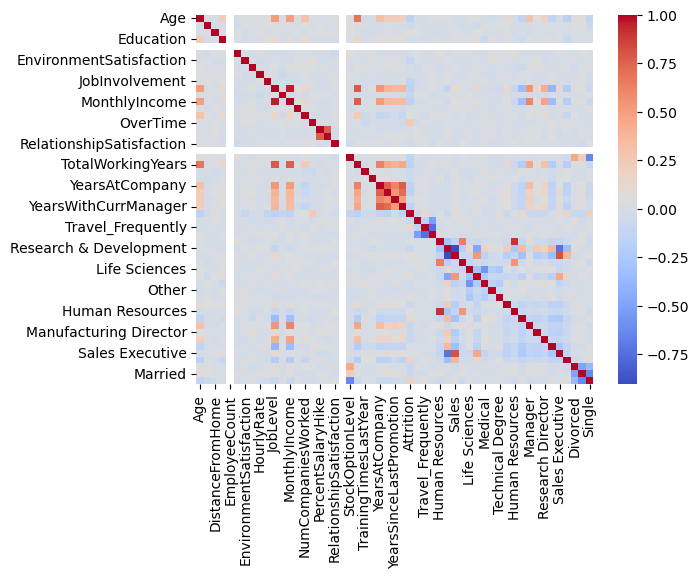

In [46]:
sns.heatmap(corr,cmap='coolwarm')

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20,random_state=21)

In [48]:
linear_model=LogisticRegression()

In [49]:
linear_score=cross_val_score(linear_model,xtrain,ytrain,cv=10)

In [50]:
linear_score.mean()

0.8779310344827586

In [51]:
svm_model=svm.SVC()

In [52]:
svm_score=cross_val_score(svm_model,xtrain,ytrain,cv=10)

In [54]:
svm_score.mean()

0.8689655172413792

In [55]:
k_score=[]

In [57]:

for i in range(3,6):
    k_model=KNeighborsClassifier(i)
    k_scores=cross_val_score(k_model,xtrain,ytrain,cv=10)
    k_score.append(k_scores.mean())

C:\Users\01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [58]:
kscore=["score for {} is : {}".format(i+3,k_score[i]) for i in range(3)]

In [59]:
kscore

['score for 3 is : 0.8331034482758621',
 'score for 4 is : 0.8475862068965517',
 'score for 5 is : 0.8448275862068966']

In [60]:
treemodel=DecisionTreeClassifier()

In [61]:
tree_score=cross_val_score(treemodel,xtrain,ytrain,cv=10)

In [62]:
tree_score.mean()

0.7751724137931034

In [63]:
forest_model=RandomForestClassifier()

In [64]:
score_forest=cross_val_score(forest_model,xtrain,ytrain,cv=10)

In [65]:
score_forest.mean()

0.86